In [1]:
import numpy as np
import pandas as pd
import quandl

In [2]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [3]:
aapl = quandl.get('WIKI/AAL.11',start_date=start,end_date=end)
cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

In [4]:
aapl

,Adj. Close
Date,
2012-01-03,13.303512
2012-01-04,13.069661
2012-01-05,14.212931
2012-01-06,14.550716
2012-01-09,14.862517
...,...
2016-12-23,48.170973
2016-12-27,48.300145
2016-12-28,47.366137


In [5]:
cisco

,Adj. Close
Date,
2012-01-03,15.617341
2012-01-04,15.919125
2012-01-05,15.860445
2012-01-06,15.801764
2012-01-09,15.902359
...,...
2016-12-23,29.475311
2016-12-27,29.620129
2016-12-28,29.369111


###  Cumulative Returns

In [6]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

In [7]:
aapl

,Adj. Close,Normed Return
Date,,
2012-01-03,13.303512,1.000000
2012-01-04,13.069661,0.982422
2012-01-05,14.212931,1.068359
2012-01-06,14.550716,1.093750
2012-01-09,14.862517,1.117188
...,...,...
2016-12-23,48.170973,3.620922
2016-12-27,48.300145,3.630631
2016-12-28,47.366137,3.560424


In [8]:
aapl.tail()

,Adj. Close,Normed Return
Date,,
2016-12-23,48.170973,3.620922
2016-12-27,48.300145,3.630631
2016-12-28,47.366137,3.560424
2016-12-29,46.948814,3.529054
2016-12-30,46.392384,3.487228


In [9]:
# 30% in apple
# 20% in cisco
# 40% in ibm
# 10% in amzn

In [10]:
list(zip((aapl,cisco,ibm,amzn),[.3,.2,.4,.1]))

[(            Adj. Close  Normed Return
  Date                                 
  2012-01-03   13.303512       1.000000
  2012-01-04   13.069661       0.982422
  2012-01-05   14.212931       1.068359
  2012-01-06   14.550716       1.093750
  2012-01-09   14.862517       1.117188
  ...                ...            ...
  2016-12-23   48.170973       3.620922
  2016-12-27   48.300145       3.630631
  2016-12-28   47.366137       3.560424
  2016-12-29   46.948814       3.529054
  2016-12-30   46.392384       3.487228
  
  [1258 rows x 2 columns],
  0.3),
 (            Adj. Close  Normed Return
  Date                                 
  2012-01-03   15.617341       1.000000
  2012-01-04   15.919125       1.019324
  2012-01-05   15.860445       1.015566
  2012-01-06   15.801764       1.011809
  2012-01-09   15.902359       1.018250
  ...                ...            ...
  2016-12-23   29.475311       1.887345
  2016-12-27   29.620129       1.896618
  2016-12-28   29.369111       1.880545
  

In [11]:
for stock_df , allo in zip((aapl,cisco,ibm,amzn),[.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [12]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,13.303512,1.000000,0.300000
2012-01-04,13.069661,0.982422,0.294727
2012-01-05,14.212931,1.068359,0.320508
2012-01-06,14.550716,1.093750,0.328125
2012-01-09,14.862517,1.117188,0.335156


In [13]:
ibm.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,157.578371,1.000000,0.400000
2012-01-04,156.935540,0.995921,0.398368
2012-01-05,156.191208,0.991197,0.396479
2012-01-06,154.398046,0.979817,0.391927
2012-01-09,153.594506,0.974718,0.389887


In [14]:
amzn.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,179.03,1.000000,0.100000
2012-01-04,177.51,0.991510,0.099151
2012-01-05,177.61,0.992068,0.099207
2012-01-06,182.61,1.019997,0.102000
2012-01-09,178.56,0.997375,0.099737


In [15]:
cisco.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,15.617341,1.000000,0.200000
2012-01-04,15.919125,1.019324,0.203865
2012-01-05,15.860445,1.015566,0.203113
2012-01-06,15.801764,1.011809,0.202362
2012-01-09,15.902359,1.018250,0.203650


In [16]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Position Values'] = stock_df['Allocation'] * 1000000

In [17]:
aapl.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,13.303512,1.000000,0.300000,300000.0000
2012-01-04,13.069661,0.982422,0.294727,294726.5625
2012-01-05,14.212931,1.068359,0.320508,320507.8125
2012-01-06,14.550716,1.093750,0.328125,328125.0000
2012-01-09,14.862517,1.117188,0.335156,335156.2500


In [18]:
aapl.tail()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2016-12-23,48.170973,3.620922,1.086277,1.086277e+06
2016-12-27,48.300145,3.630631,1.089189,1.089189e+06
2016-12-28,47.366137,3.560424,1.068127,1.068127e+06
2016-12-29,46.948814,3.529054,1.058716,1.058716e+06
2016-12-30,46.392384,3.487228,1.046169,1.046169e+06


In [19]:
cisco.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,15.617341,1.000000,0.200000,200000.000000
2012-01-04,15.919125,1.019324,0.203865,203864.734300
2012-01-05,15.860445,1.015566,0.203113,203113.258186
2012-01-06,15.801764,1.011809,0.202362,202361.782072
2012-01-09,15.902359,1.018250,0.203650,203650.026838


In [20]:
cisco.tail()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2016-12-23,29.475311,1.887345,0.377469,377469.015679
2016-12-27,29.620129,1.896618,0.379324,379323.596496
2016-12-28,29.369111,1.880545,0.376109,376108.989746
2016-12-29,29.407729,1.883018,0.376604,376603.544631
2016-12-30,29.176020,1.868181,0.373636,373636.215323


In [21]:
ibm.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,157.578371,1.000000,0.400000,400000.000000
2012-01-04,156.935540,0.995921,0.398368,398368.223296
2012-01-05,156.191208,0.991197,0.396479,396478.797638
2012-01-06,154.398046,0.979817,0.391927,391926.999463
2012-01-09,153.594506,0.974718,0.389887,389887.278583


In [22]:
ibm.tail()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2016-12-23,160.477796,1.018400,0.407360,407359.955612
2016-12-27,160.891721,1.021027,0.408411,408410.671112
2016-12-28,159.977235,1.015223,0.406089,406089.322915
2016-12-29,160.371908,1.017728,0.407091,407091.167926
2016-12-30,159.784712,1.014002,0.405601,405600.618032


In [23]:
amzn.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,179.03,1.000000,0.100000,100000.000000
2012-01-04,177.51,0.991510,0.099151,99150.980283
2012-01-05,177.61,0.992068,0.099207,99206.836843
2012-01-06,182.61,1.019997,0.102000,101999.664861
2012-01-09,178.56,0.997375,0.099737,99737.474166


In [24]:
amzn.tail()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2016-12-23,760.59,4.248394,0.424839,424839.412389
2016-12-27,771.40,4.308775,0.430878,430877.506563
2016-12-28,772.13,4.312853,0.431285,431285.259454
2016-12-29,765.15,4.273865,0.427386,427386.471541
2016-12-30,749.87,4.188516,0.418852,418851.589119


In [25]:
all_pos_vals = [aapl['Position Values'],cisco['Position Values'],ibm['Position Values'],amzn['Position Values']]



portfolio_val = pd.concat(all_pos_vals, axis=1)

In [26]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2012-01-03,300000.0000,200000.000000,400000.000000,100000.000000
2012-01-04,294726.5625,203864.734300,398368.223296,99150.980283
2012-01-05,320507.8125,203113.258186,396478.797638,99206.836843
2012-01-06,328125.0000,202361.782072,391926.999463,101999.664861
2012-01-09,335156.2500,203650.026838,389887.278583,99737.474166


In [27]:
portfolio_val.columns = ['AAPL POS','CISCO POS','IBM POS','AMZN POS']

In [28]:
portfolio_val.head()

,AAPL POS,CISCO POS,IBM POS,AMZN POS
Date,,,,
2012-01-03,300000.0000,200000.000000,400000.000000,100000.000000
2012-01-04,294726.5625,203864.734300,398368.223296,99150.980283
2012-01-05,320507.8125,203113.258186,396478.797638,99206.836843
2012-01-06,328125.0000,202361.782072,391926.999463,101999.664861
2012-01-09,335156.2500,203650.026838,389887.278583,99737.474166


In [29]:
portfolio_val.tail()

,AAPL POS,CISCO POS,IBM POS,AMZN POS
Date,,,,
2016-12-23,1.086277e+06,377469.015679,407359.955612,424839.412389
2016-12-27,1.089189e+06,379323.596496,408410.671112,430877.506563
2016-12-28,1.068127e+06,376108.989746,406089.322915,431285.259454
2016-12-29,1.058716e+06,376603.544631,407091.167926,427386.471541
2016-12-30,1.046169e+06,373636.215323,405600.618032,418851.589119


In [30]:
portfolio_val['TOTAL POS'] = portfolio_val.sum(axis=1)

In [31]:
portfolio_val.head()

,AAPL POS,CISCO POS,IBM POS,AMZN POS,TOTAL POS
Date,,,,,
2012-01-03,300000.0000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,294726.5625,203864.734300,398368.223296,99150.980283,9.961105e+05
2012-01-05,320507.8125,203113.258186,396478.797638,99206.836843,1.019307e+06
2012-01-06,328125.0000,202361.782072,391926.999463,101999.664861,1.024413e+06
2012-01-09,335156.2500,203650.026838,389887.278583,99737.474166,1.028431e+06


In [32]:
portfolio_val.tail()

,AAPL POS,CISCO POS,IBM POS,AMZN POS,TOTAL POS
Date,,,,,
2016-12-23,1.086277e+06,377469.015679,407359.955612,424839.412389,2.295945e+06
2016-12-27,1.089189e+06,379323.596496,408410.671112,430877.506563,2.307801e+06
2016-12-28,1.068127e+06,376108.989746,406089.322915,431285.259454,2.281611e+06
2016-12-29,1.058716e+06,376603.544631,407091.167926,427386.471541,2.269797e+06
2016-12-30,1.046169e+06,373636.215323,405600.618032,418851.589119,2.244257e+06


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

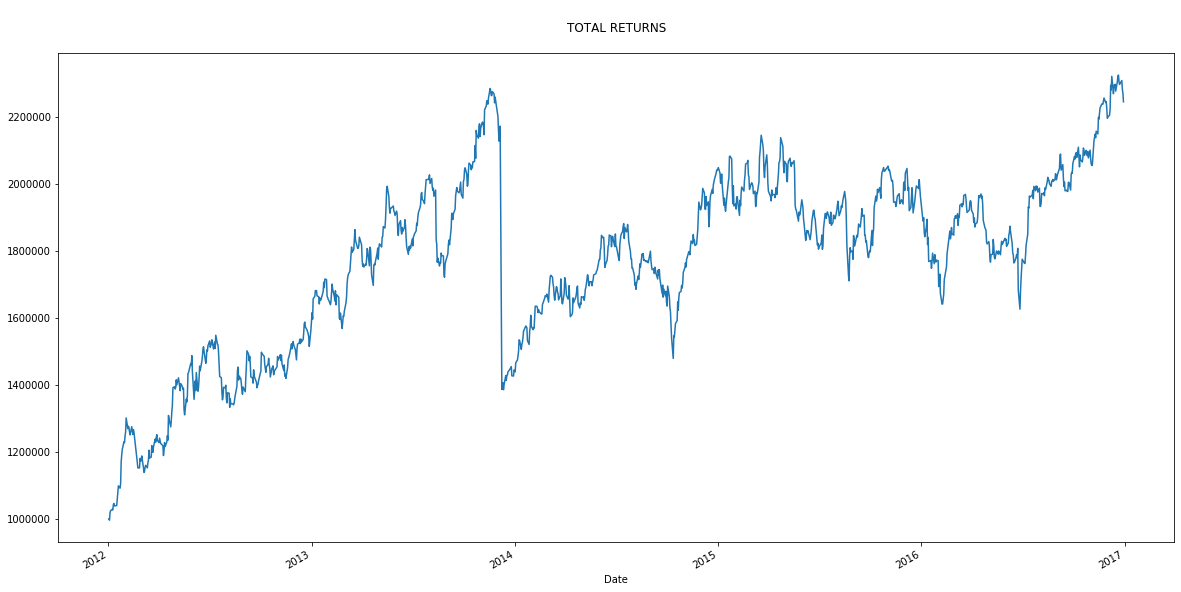

In [34]:
portfolio_val['TOTAL POS'].plot(figsize=(20,10))
plt.title('\nTOTAL RETURNS\n');

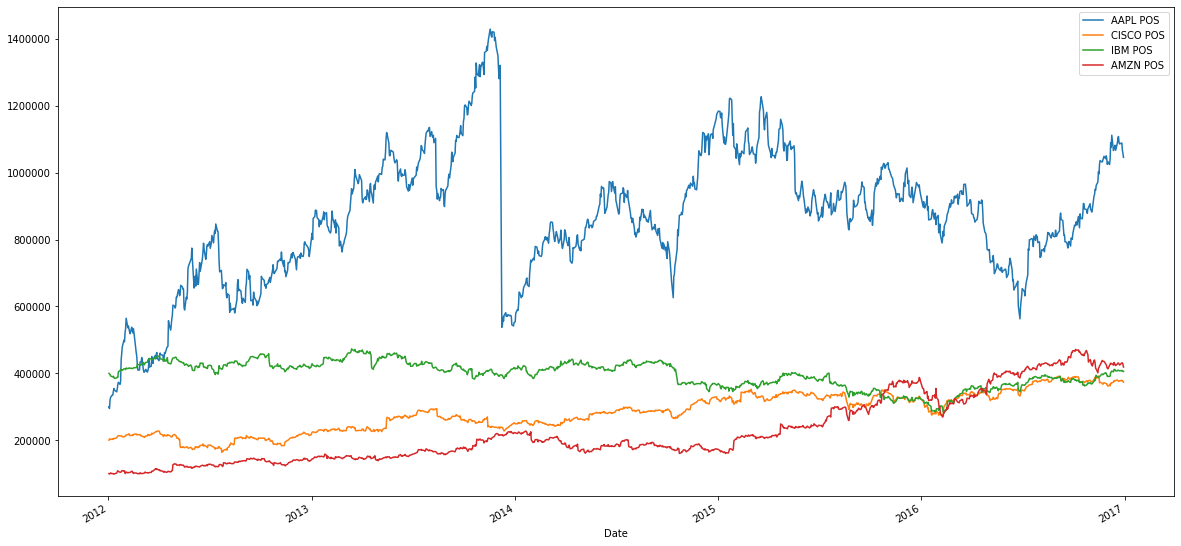

In [35]:
portfolio_val.drop('TOTAL POS',axis=1).plot(figsize=(20,10));

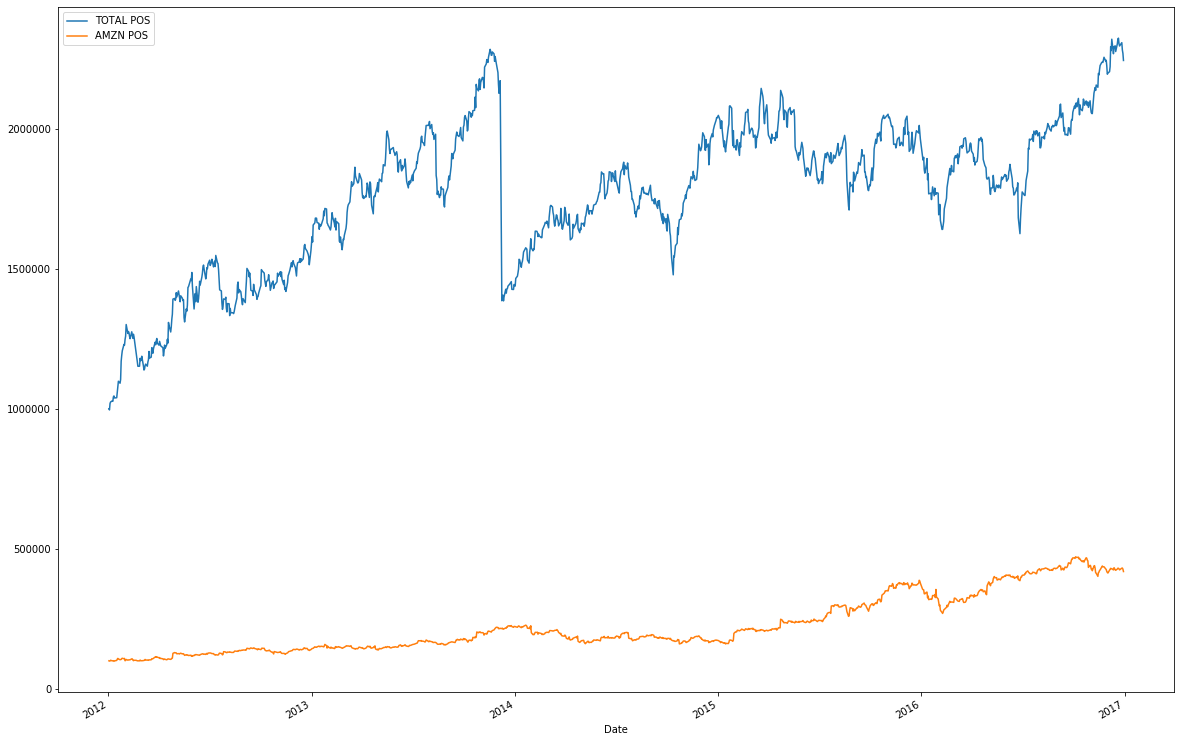

In [36]:
portfolio_val['TOTAL POS'].plot(figsize=(20,14))
portfolio_val['AMZN POS'].plot()
plt.legend();

In [37]:
portfolio_val['AAPL POS'].sum()

1087309382.1441045

In [38]:
portfolio_val['IBM POS'].sum()

499592379.1482959

In [39]:
portfolio_val['CISCO POS'].sum()

355210274.55686176

In [40]:
portfolio_val['AMZN POS'].sum()

285289237.5020946

In [41]:
portfolio_val['TOTAL POS'].sum()

2227401273.351357

### Portfolio Stats

In [42]:
portfolio_val.head()

,AAPL POS,CISCO POS,IBM POS,AMZN POS,TOTAL POS
Date,,,,,
2012-01-03,300000.0000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,294726.5625,203864.734300,398368.223296,99150.980283,9.961105e+05
2012-01-05,320507.8125,203113.258186,396478.797638,99206.836843,1.019307e+06
2012-01-06,328125.0000,202361.782072,391926.999463,101999.664861,1.024413e+06
2012-01-09,335156.2500,203650.026838,389887.278583,99737.474166,1.028431e+06


In [45]:
portfolio_val['Daily Return'] = portfolio_val['TOTAL POS'].pct_change(1)

In [46]:
portfolio_val.head()

,AAPL POS,CISCO POS,IBM POS,AMZN POS,TOTAL POS,Daily Return
Date,,,,,,
2012-01-03,300000.0000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,294726.5625,203864.734300,398368.223296,99150.980283,9.961105e+05,-0.003889
2012-01-05,320507.8125,203113.258186,396478.797638,99206.836843,1.019307e+06,0.023287
2012-01-06,328125.0000,202361.782072,391926.999463,101999.664861,1.024413e+06,0.005010
2012-01-09,335156.2500,203650.026838,389887.278583,99737.474166,1.028431e+06,0.003922


In [47]:
portfolio_val['Daily Return'].mean()

0.0008220822523777833

In [48]:
portfolio_val['Daily Return'].std()

0.0179627670620585

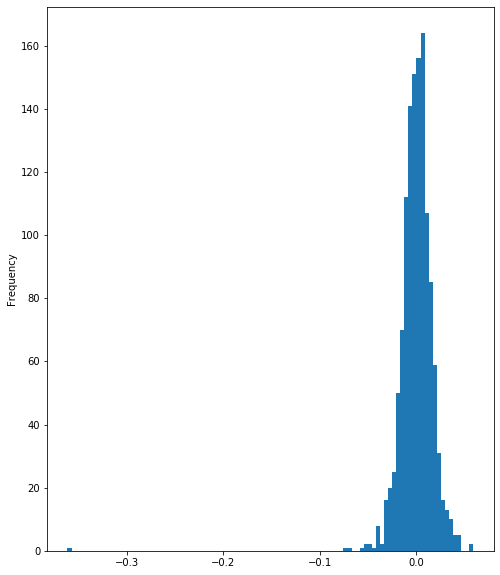

In [50]:

portfolio_val['Daily Return'].plot(kind='hist',bins=100,figsize=(8,10));

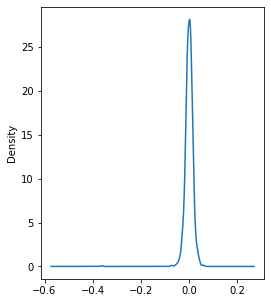

In [52]:
portfolio_val['Daily Return'].plot(kind='kde',figsize=(4,5));

In [53]:
cumulative_return = 100 * (portfolio_val['TOTAL POS'][-1]/portfolio_val['TOTAL POS'][0] - 1)

In [54]:
cumulative_return

124.42569448104214

In [55]:
portfolio_val['TOTAL POS'][-1]

2244256.9448104217

### William Sharpe's Sharpe Ratio

In [56]:
SR = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()

In [57]:
SR

0.04576590285547989

In [58]:
ASR = (252**0.5) * SR

In [59]:
ASR

0.7265111848916437